In [1]:
from Bresenheim import *
import pickle
import matplotlib.pyplot as plt
from itertools import product
from scipy import ndimage

In [2]:
# creat frc and save
# cube = test(256)
# pickle.dump(cube,open('testdat/frc.pkl','wb'))

In [12]:
cube = pickle.load(open('testdat/frc.pkl','rb'))

In [13]:
# random position for slice 
index = np.random.randint(0,252)
axes = np.random.randint(3)
print(index)
print(axes)

cut = np.rot90(cube,axes)[index:index + 4]
compressed_cut = np.sum(cut,axis = 0)
print(cut.shape)
print(compressed_cut.shape)
print(compressed_cut)

168
0
(4, 256, 256)
(256, 256)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [14]:
# d = [4] * 256
# enlarge_mat = np.diag(d)
# b = compressed_cut * enlarge_mat

# try to scale it down : 
# help_array = np.ones()
# c2 = np.kron(cube)
# input_size = 256
# output_size = 64
# bin_size = input_size // output_size
# small_image = large_image.reshape((1, output_size, bin_size,
#                                       output_size, bin_size)).max(4).max(2)
# c2 = np.resize(cube,(50,50,50))

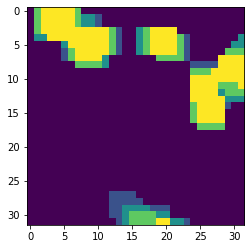

In [18]:
slicee = cube[128:128+4,:32,:32]
plt.imshow(np.sum(slicee,axis = 0))

In [15]:
c = np.kron(compressed_cut, np.ones((4,4)))

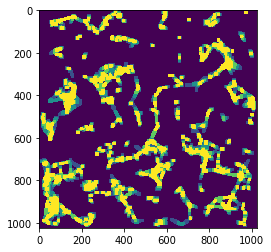

In [16]:
plt.imshow(c)

In [ ]:
plt.imshow(c * 200)
plt.show()
width,height = c.shape
print(width,height)
print(c)
x_axis = np.arange(512)
y_axis = np.arange(512)
#[216] [369] 39

mask = (x_axis[np.newaxis,:]-369)**2 + (y_axis[:,np.newaxis]-216)**2 < 39**2
mask = mask  * (1/.39)
print(mask)
plt.imshow(mask)
print(mask)
plt.show()
indeces = np.where(mask)
print(indeces)
print(sum(c[indeces]))
# c = c + mask
plt.imshow(c)

In [ ]:
def fill_circles(M):
    # pad with 4s to prevent circles over boundary:
    M = np.pad(M,1,'constant', constant_values = 4)
    
    width,height = M.shape
    # blueprint for circular masks :
    x_axis = np.arange(width)
    y_axis = np.arange(height)
    
    # negative of image to calculate maximim dists
    negative = M == 0.
    dist_matrix = ndimage.distance_transform_edt(negative)
    max_dist = int(max(dist_matrix.flatten()))
    
    # cut of boundaries : 
    cut_off = int(.5 * max_dist)
    dists = dist_matrix[cut_off:-cut_off,cut_off:-cut_off]
    cx,cy = np.where(dists == dists.max())
    cx += cut_off
    cy += cut_off
    max_radius = int(dist_matrix[cx,cy][0])
    
    # list for color values of circles : 
    colors = np.linspace(1,3,max_radius + 1)[::-1]
    # save radii used : 
    radii_list = []
    # frames for animation :
    dist_frames = []
    frames = []
    
    while max_radius > 7:
        # place largest possible circle at possition with max distance 
        mask = (x_axis[np.newaxis,:]-cy[0])**2 + (y_axis[:,np.newaxis]-cx[0])**2 < max_radius**2
        indeces = np.where(mask)
        # set mask to nice collor value
        mask = mask  * colors[max_radius]

        if sum(M[indeces]) != 0.: # Check if circle actually fits
            max_radius -= 1 
        else:
            # update :
            M = M + mask
            negative = M == 0.
            dist_matrix = ndimage.distance_transform_edt(negative)
            radii_list.append(max_radius)
            
            # show distances between gaps : 
            #d_frame = plt.imshow(dist_matrix,animated = True)#, animated = True
            #d_frame.colorbar()
            dist_frames.append(dist_matrix)
            
            # find new circle : 
            max_dist = int(max(dist_matrix.flatten()))
            # cut of boundaries : 
            cut_off = int( .5 *  max_dist)#.5 *
            dists = dist_matrix[cut_off:-cut_off,cut_off:-cut_off]
            cx,cy = np.where(dists == dists.max())
            cx += cut_off
            cy += cut_off
            max_radius = int(dist_matrix[cx,cy][0])
            
            # show updated matrix
            #frame = plt.imshow(M,animated = True)
            #frame.colorbar()
            frames.append(M)
            
    return M,radii_list,dist_frames,frames
    #max_radii = [i for i in sorted(dist_mattix.flatten())[::-1] if i > 2.]
    

In [ ]:
filled,radii,frames1,frames2 = fill_circles(c)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
%matplotlib notebook

fps = 30
nSeconds = 5

fig = plt.figure(figsize = (10,10))
f1 = frames2[0]
im = plt.imshow(f1)

def animate(i):
    im.set_array(frames2[i])
    return [im]

anim = animation.FuncAnimation(fig,animate,frames = nSeconds * fps,
                              interval = 1000/fps)

anim.save('gap_filling_animation.mp4')

plt.show()

In [ ]:
import matplotlib.animation as animation
%matplotlib notebook
fig = plt.figure()
ani = animation.ArtistAnimation(fig, frames2, interval=100, blit=True,
                                repeat_delay=1000)
plt.show()

In [ ]:
for f in 

In [ ]:
plt.hist(radii,20)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
%matplotlib notebook
fig = plt.figure()


def f(x, y):
    return np.sin(x) + np.cos(y)
#plt.ioff()
x = np.linspace(0, 2 * np.pi, 120)
y = np.linspace(0, 2 * np.pi, 100).reshape(-1, 1)
# ims is a list of lists, each row is a list of artists to draw in the
# current frame; here we are just animating one artist, the image, in
# each frame
ims = []
for i in range(60):
    x += np.pi / 15.
    y += np.pi / 20.
    im = plt.imshow(f(x, y), animated=True)
#     plt.imshow(f(x,y))
    
#     plt.show()
    ims.append([im])

ani = animation.ArtistAnimation(fig, ims, interval=50, blit=True,
                                repeat_delay=1000)

#ani.save('dynamic_images.mp4')

plt.show()

In [ ]:
x = compressed_cut[:25,:25]
plt.imshow(x)
plt.show()

# create negative : 
neg = compressed_cut == 0.
plt.imshow(neg)
plt.show()
dists = ndimage.distance_transform_edt(neg)

max_radii = [i for i in sorted(dists.flatten())[::-1] if i > 2.]
print(max_radii)
a,b = np.where(dists == dists.max())
max_radius = dists[a,b]
plt.imshow(dists)
print(max_radius)

In [ ]:
flat_distances = dists.flatten()
plt.hist(flat_distances,100)
plt.show()

In [ ]:
def fill_circlesNAIF(M):
    """ fill non zero spots with larges possible circels """
    width,height = M.shape
    
    # calculate max radius : 
    neg = M == 0.
    dists = ndimage.distance_transform_edt(neg) # distances between nonzero elements
#     x,y = np.where(dists == dists.max())
#     max_radius = dists[a,b][0]
#     radii = np.arange(1,max(dists))[::-1]
    
    # copy to store circles in ; 
    cop = np.array(M,copy = True)
    # blueprint for circular masks :
    x_axis = np.arange(width)
    y_axis = np.arange(height)
    
    for r in radii:
        # list of possible position of center of circle:
        axis_range = np.arange(r,width - r)
        centers = list(product(axis_range,axis_range))
        print(r)
        print(len(centers))
        for c in centers:
            mask = (x_axis[np.newaxis,:]-c[0])**2 + (y_axis[:,np.newaxis]-c[1])**2 < r**2
            if sum(M[mask]) == 0.:
                M[mask] = float(r + width)
                plt.imshow(M)
                plt.show()
                print('added circle with radius ', r)
    return M